In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data from the excel file.
Keep only relevant columns for the purpose of the analysis. 

In [16]:
raw_data=pd.read_excel('ice index.xlsx')

In [17]:
keep_cols=[
'Ticker',
'Current Coupon',
'ISO Currency',
'Issue Year',
'Issue Month',
'Issuer Ultimate Parent Name',
'Type',
'Excess Rtn % 1-day',
'Excess Rtn % 1-week',
'Excess Rtn % 1-month',
'Excess Rtn % 6-month',
'Excess Rtn % 12-month',
'Excess Rtn % 3-month',
'Excess Rtn % MTD',
'Excess Rtn % QTD',
'Excess Rtn % YTD',
'OAS',
'OAS 1-Day Change',
'OAS 1-Week Change',
'OAS 1-Mo Change',
'OAS 3-Mo Change',
'OAS 12-Mo Change',
'OAS 6-Mo Change',
'OAS MTD Change',
'OAS QTD Change',
'OAS YTD Change',
'Yld to Maturity',
'Yld to Worst',
'Current Yield',
'Yield to Next Call',
'Face Value LOC',
'Bid-Offer Spread',
'Price',
'Rating - Middle of Three',
'ISO Country',
'MLIndLvl2 code',
'MLIndLvl3 code',
'MLIndLvl4 code',
'Maturity / WAL',
'Mod Dur To Worst',
'Modified Dur',
'Spread Duration',
'Years since Issue',
'Years to Final Maturity',
'Yrs To Worst',
'Liquidity_Rank',
'Rating_Class_Rating - Middle of Three',
'Rating_Score_Rating - Middle of Three',
'YTW_BE',
'OAS_BE',
'DTS']

Process the data:
1) Fix the name of Rating Columns
2) Select only "SENR" (Senior Unsecured) bonds which is the scope of the analysis

In [19]:
data=raw_data.loc[:,keep_cols]
data=data.rename(columns={'Rating - Middle of Three':'Rating','Rating_Class_Rating - Middle of Three':'Rating_Class_Rating',
'Rating_Score_Rating - Middle of Three':'Rating_Score_Rating'})
data=data[data['Type']=='SENR']

Check the quality of the data.
1) NaNs
2) Data type structure
This allows to process more efficiently the data and understand the quality of the data set.

In [21]:
check_na=data.isna().sum()
check_na.name='NaN'
type_columns=data.dtypes.rename('DataType')
des_columns=type_columns[type_columns=='object']
data_check=pd.concat([data.describe().loc['count',:],check_na,type_columns],axis=1)
print(data_check.sort_values(by=['NaN'],ascending=False))
print(f"Number of columns per data type {data_check.groupby(by=['DataType']).describe().iloc[:,0]}")

                              count   NaN DataType
Yield to Next Call           7105.0  1933  float64
Excess Rtn % 12-month        7625.0  1413  float64
OAS 12-Mo Change             7722.0  1316  float64
OAS YTD Change               8117.0   921  float64
Excess Rtn % YTD             8117.0   921  float64
Excess Rtn % 6-month         8213.0   825  float64
OAS 6-Mo Change              8280.0   758  float64
Excess Rtn % 3-month         8634.0   404  float64
OAS 3-Mo Change              8749.0   289  float64
Excess Rtn % 1-month         8946.0    92  float64
Excess Rtn % QTD             8946.0    92  float64
OAS QTD Change               8972.0    66  float64
OAS 1-Mo Change              9009.0    29  float64
Issuer Ultimate Parent Name     NaN     1   object
Type                            NaN     0   object
Years to Final Maturity      9038.0     0  float64
Yrs To Worst                 9038.0     0  float64
Liquidity_Rank               9038.0     0  float64
Rating_Score_Rating          90

Drop NaNs

In [36]:
clean_data=data.drop(columns=['Yield to Next Call']) #remove Yield to Next Call 
clean_data=clean_data.dropna(axis=0) #drop all instances where there are NaNs
print(f'The raw data had {len(data)}, after dropping {len(clean_data)} NaNs')

The raw data had 9038, after dropping 7624 NaNs


Analyse the distribution of Ratings

Text(0.5, 1.0, 'Distribution of Ratings')

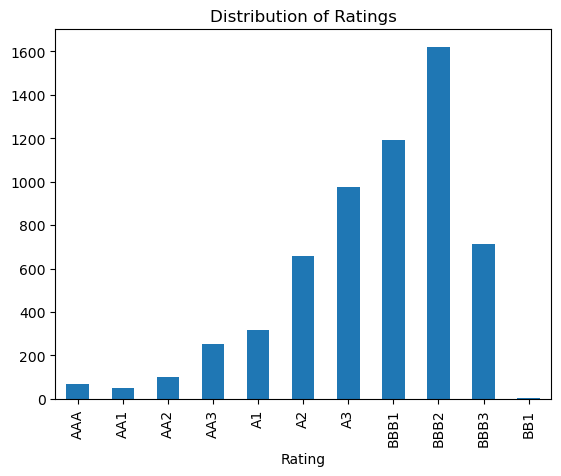

In [25]:
rating_data=clean_data.iloc[:,clean_data.columns.str.contains('Rating')]
dist_rating=rating_data.groupby(by=['Rating'])['Rating_Score_Rating'].describe().sort_values(by=['mean'])
dist_rating['count'].plot.bar()
plt.title('Distribution of Ratings')